In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') 

In [3]:
df = pd.read_csv('./eda_data/OnlineRetail.csv')
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()           # True => 1, False => 0

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
df.describe()        #numeric defarlt

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [11]:
df['checkoutprice'] = df['UnitPrice'] * df['Quantity']

In [12]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [14]:
df.to_csv('./eda_data/onlineretailclean.csv')

In [15]:
dtypes = {'UnitPrice':np.float32,
         'CustomerID' : np.float32,
         'Quality' : np.int32}
retail = pd.read_csv('./eda_data/onlineretailclean.csv',dtype=dtypes, index_col=0)
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      397884 non-null  int64  
 1   StockCode      397884 non-null  object 
 2   Description    397884 non-null  object 
 3   Quantity       397884 non-null  int64  
 4   InvoiceDate    397884 non-null  object 
 5   UnitPrice      397884 non-null  float32
 6   CustomerID     397884 non-null  float32
 7   Country        397884 non-null  object 
 8   checkoutprice  397884 non-null  float64
dtypes: float32(2), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


In [16]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


<AxesSubplot:xlabel='Country'>

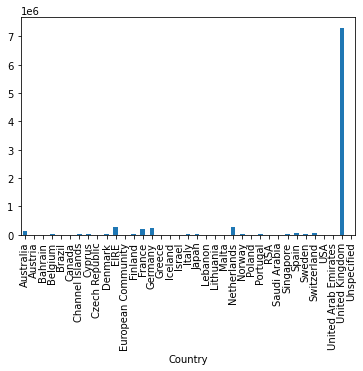

In [17]:
retail.groupby('Country')['checkoutprice'].sum().plot(kind='bar')

In [49]:
retail['month'] = retail.InvoiceDate.apply(lambda x : str(x)[:7])

In [51]:
retail.InvoiceDate = pd.to_datetime(retail.InvoiceDate)
retail['month'] = retail.InvoiceDate.apply(lambda x : str(x)[:7])

In [52]:
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


<AxesSubplot:xlabel='month'>

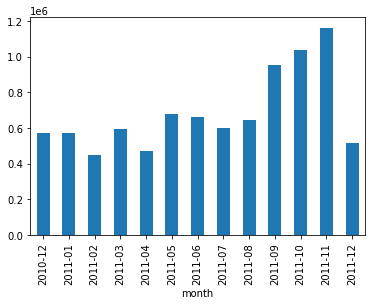

In [53]:
retail.groupby('month')['checkoutprice'].sum().plot(kind='bar')

In [ ]:
# 매출 상위

In [55]:
retail.sort_values('checkoutprice', ascending=False)[:10].StockCode

540421     23843
61619      23166
222680     22502
173382      POST
348325     23243
160546     21108
52711      21108
421601     23084
52709     85123A
160542    85123A
Name: StockCode, dtype: object

In [ ]:
# cohort
# - 유사한 집단간 비교 분석
# - 고객의 retention => retention이 높은 집단 => 우수 고객
# - 고객 세그먼트 : 언제 처음 구매를 했는가

In [ ]:
# 우수 고객
# - 구매 횟수 기준
# - 지불 금액 기준

In [54]:
retail.groupby('CustomerID')['checkoutprice'].sum().sort_values(ascending=False).iloc[:10]      

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: checkoutprice, dtype: float64

In [ ]:
# 어느 월에 구매한 고객이 retention이 높은가

In [60]:
import datetime

In [62]:
def get_month_as_datetime(date):
    return datetime.datetime(date.year, date.month, 1)

retail['Month'] = retail['InvoiceDate'].apply(get_month_as_datetime)             # 그냥 데이트타임 적용해주는게 편하지 않을까? dt.year로?

In [63]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice,month,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01


In [65]:
# group객체 transform 메서드를 적용 => 그룹 내에서 함수를 적용한 값을 출력..데이터 길이만큼 출력

retail['MonthStarted'] = retail.groupby('CustomerID')['Month'].transform(np.min)
retail.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice,month,Month,MonthStarted
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010-12-01,2010-12-01


In [67]:
retail.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice,month,Month,MonthStarted
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12,2011-12-01,2011-08-01


In [ ]:
# 각 구매가 최초 구매로부터 얼마의 개월이 지났는지(단위 : 월)

In [71]:
retail['MonthPassed'] = (retail['Month'].dt.year - retail['MonthStarted'].dt.year)*12 + (retail['Month'].dt.month - retail['MonthStarted'].dt.month)

In [73]:
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice,month,Month,MonthStarted,MonthPassed
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010-12-01,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01,2010-12-01,0


In [88]:
def get_unique_no(x):
    return len(np.unique(x))

cohort_grop = retail.groupby(['MonthStarted', 'MonthPassed'])
cohort_df = cohort_grop['CustomerID'].apply(get_unique_no).reset_index()
cohort_df.head(5)

,MonthStarted,MonthPassed,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321


In [91]:
cohort_df = cohort_df.pivot(index="MonthStarted", columns = 'MonthPassed')

In [92]:
cohort_df

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01-01        417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01        380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01        452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01        300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   
2011-05-01        284.0   54.0   49.0   49.0   59.0   66.0   75.0   27.0   
2011-06-01        242.0   42.0   38.0   64.0   56.0   81.0   23.0    NaN   
2011-07-01        188.0   34.0   39.0   42.0   51.0   21.0    NaN    NaN   
2011-08-01        169.0   35.0   42.0   41.0   21.0    NaN    NaN    NaN   
2011-09-01        299.0   70.0   90.0   34.0    NaN    NaN    NaN    NaN   
2011-10-01        358.0   86.0   41.0    NaN    NaN    NaN    NaN    NaN   
2011-11-01        323.0   36.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01         41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    313.0  350.0  331.0  445.0  235.0  
2011-01-01    125.0  136.0  152.0   49.0    NaN  
2011-02-01     94.0  116.0   26.0    NaN    NaN  
2011-03-01    126.0   39.0    NaN    NaN    NaN  
2011-04-01     22.0    NaN    NaN    NaN    NaN  
2011-05-01      NaN    NaN    NaN    NaN    NaN  
2011-06-01      NaN    NaN    NaN    NaN    NaN  
2011-07-01      NaN    NaN    NaN    NaN    NaN  
2011-08-01      NaN    NaN    NaN    NaN    NaN  
2011-09-01      NaN    NaN    NaN    NaN    NaN  
2011-10-01      NaN    NaN    NaN    NaN    NaN  
2011-11-01      NaN    NaN    NaN    NaN    NaN  
2011-12-01      NaN    NaN    NaN    NaN    NaN

In [85]:
cohort_df = cohort_df.pivot(index='MonthStarted', columns='MonthPassed', values='CustomerID')

KeyError: 'MonthStarted'

In [93]:
cohort_df.div(cohort_df.iloc[:0], axis=0)

CustomerID                                                
MonthPassed          0   1   2   3   4   5   6   7   8   9   10  11  12
MonthStarted                                                           
2010-12-01          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2011-01-01          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2011-02-01          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2011-03-01          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2011-04-01          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2011-05-01          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2011-06-01          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2011-07-01          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2011-08-01          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2011-09-01          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2011-10-01          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2011-11-01          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2011-12-01          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN

In [ ]:
# push notification
# 개인별 맞춤 motification



In [95]:
dtypes = {'UnitPrice':np.float32,
         'CustomerID' : np.float32,
         'Quality' : np.int32}
df = pd.read_csv('./eda_data/onlineretailclean.csv',dtype=dtypes, index_col=0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
# 구매가 가장 많은 시간대에 푸쉬 광고를 하는게 가장 광고효율이 높다

In [101]:
df.InvoiceDate.apply(lambda x: x.split()[1][0])

AttributeError: 'Timestamp' object has no attribute 'split'

In [97]:
df.groupby(df.InvoiceDate.apply(lambda x: x.split()[1][0]))['CustomerID'].count().sort_index()

KeyError: 'Column not found: CustomerID\t'

In [99]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

In [100]:
df.groupby(df['InvoiceDate'].dt.hour).size()

InvoiceDate
6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
dtype: int64

In [102]:
df['InvoiceDate'] =pd.to_datetime(df['InvoiceDate'])

In [104]:
df.set_index('InvoiceDate').groupby(lambda date:date.hour).count()['CustomerID']

InvoiceDate
6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: CustomerID, dtype: int64

In [ ]:
# idxmax : 가장 큰 값을 가지는 index를 return

In [105]:
for id, h in order_count_by_hour.groupby('CustomerID').idxmax().values:
    print(f'push ad to {id} at {h}')

NameError: name 'order_count_by_hour' is not defined

In [ ]:
timetable = [[] for _ in range(24)]
for ids, h in order_count_by_hour.groupby('CustomerID').idxmax().values:
    print(f'push ad to {ids} at {h}')
    timetable[h].append(ids)